In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import import_ipynb
from preprocessing import load_data
from sklearn.model_selection import train_test_split
import sklearn.metrics as mt
import numpy as np
import pandas as pd


def rf_model_init(X_train,y_train):
    rf_clf=RandomForestClassifier(random_state=2022)
    rf_clf.fit(X_train,y_train)
    
    return rf_clf

def rf_model_tuned(X_train,y_train):
    grid_search = {'n_estimators':[90,100,110],
              'max_depth' :[40,41,42],
              'min_samples_split' :[2,3,4],
                  'random_state':[2022]}
    clf=RandomForestClassifier()
    grid=GridSearchCV(estimator = clf, param_grid=grid_search, cv=4,n_jobs=-1, verbose=5)
    
    grid.fit(X_train,y_train)
    
    rf_model=grid.best_estimator_
    return rf_model





[IterativeImputer] Completing matrix with shape (143983, 63)
[IterativeImputer] Ending imputation round 1/20, elapsed time 22.76
[IterativeImputer] Change: 4339717.71809193, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 2/20, elapsed time 45.40
[IterativeImputer] Change: 109178.47467921741, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 3/20, elapsed time 68.30
[IterativeImputer] Change: 61326.23124082783, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 4/20, elapsed time 91.73
[IterativeImputer] Change: 47768.54785095952, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 5/20, elapsed time 115.27
[IterativeImputer] Change: 34219.36234993352, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 6/20, elapsed time 138.38
[IterativeImputer] Change: 22454.161777217312, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 7/20, elapsed time 161.52
[IterativeImputer] Ch

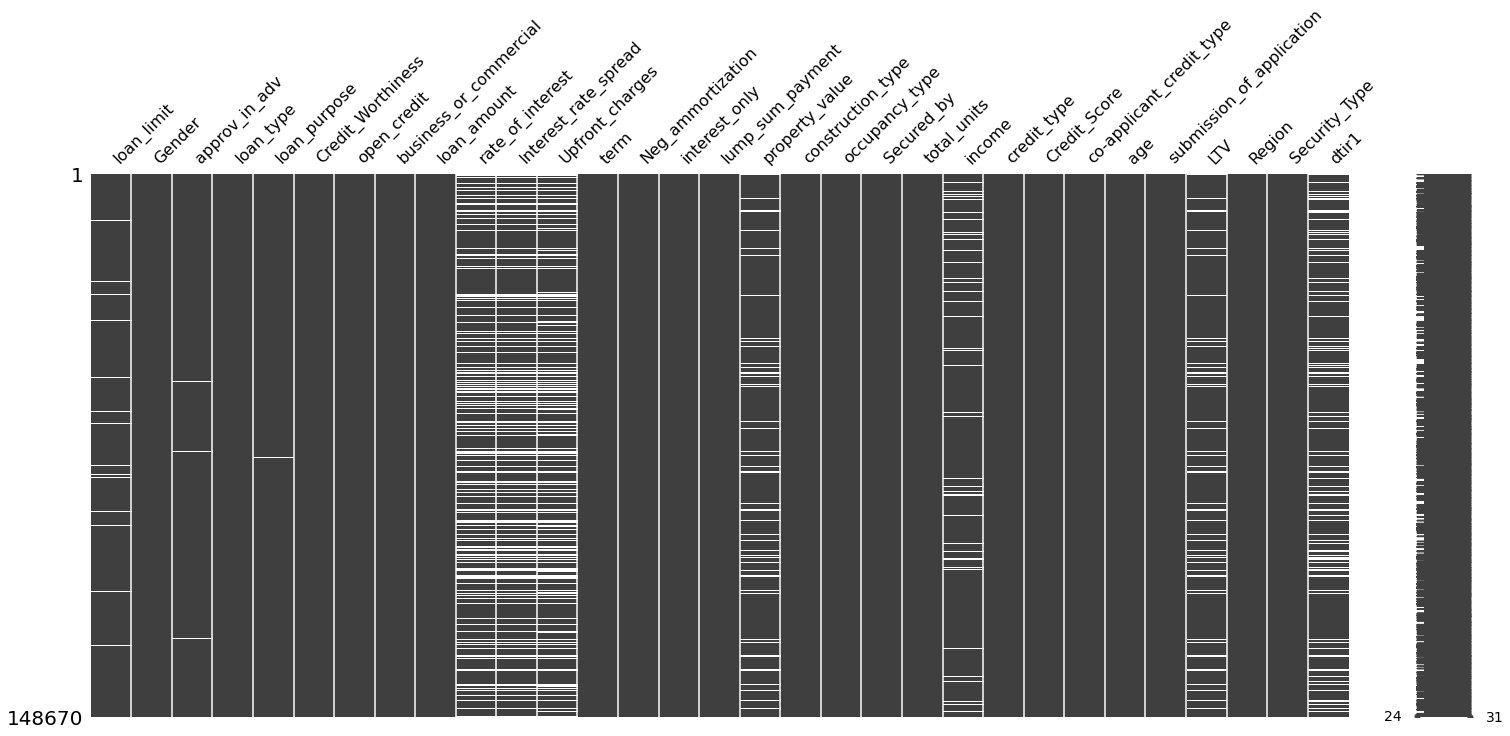

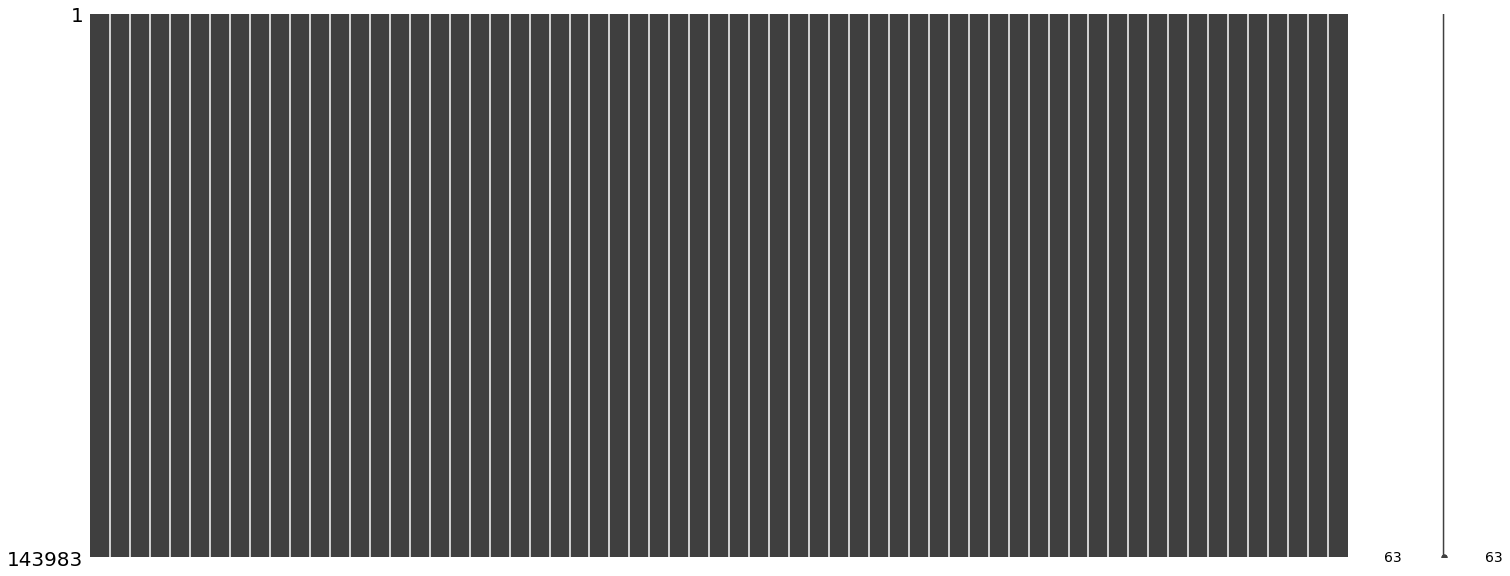

In [4]:
data,target = load_data('data/Loan_Default.csv')

In [5]:
def model_score(model=None,X_train=None,y_train=None,X_test=None,y_test=None,y_pred=None):
    print("\tTrain_Accuracy : ", model.score(X_train, y_train))
    print("\tTest_Accuracy : ", model.score(X_test, y_test), '\n')

    accuracy = mt.accuracy_score(y_test, y_pred)
    recall = mt.recall_score(y_test, y_pred, pos_label=1)
    precision = mt.precision_score(y_test, y_pred, pos_label=1)
    f1_score = mt.f1_score(y_test, y_pred, pos_label=1)
    matrix = pd.DataFrame(mt.confusion_matrix(y_test, y_pred),columns=['pred_no','pred_yes'])
    matrix.index = ['actual_no','actual_yes']
    
    print('\tAccuracy: ', format(accuracy,'.4f'),'\n')
    print('\tRecall: ', format(recall,'.4f'),'\n')
    print('\tPrecision: ', format(precision,'.4f'),'\n')
    print('\tF1_score: ', format(f1_score,'.4f'),'\n')
    print('\tConfusion Matrix:','\n', matrix)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(data,target,train_size=0.7,random_state=2022)
rf=rf_model_init(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=2022)

In [9]:
# 하이퍼 파라미터 튜닝 전
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2022,
 'verbose': 0,
 'warm_start': False}

In [10]:
init_y_pred=rf.predict(X_test)

In [15]:
# 하이퍼파라미터 튜닝 전 랜덤포레스트 score
model_score(rf,X_train,y_train,X_test,y_test,init_y_pred)

	Train_Accuracy :  1.0
	Test_Accuracy :  0.9638384072230582 

	Accuracy:  0.9638 

	Recall:  0.8647 

	Precision:  0.9844 

	F1_score:  0.9206 

	Confusion Matrix: 
             pred_no  pred_yes
actual_no     32574       144
actual_yes     1418      9059


In [16]:
# max_depth 하이퍼파라미터 None 값이라 직접 검색
# 각 개별트리의 depth 값 찾아서 중앙값 검색
depth_li = list()
for es in rf.estimators_:
    depth_li.append(es.get_depth())
print(np.median(depth_li))
print(depth_li)
#max(depth_li)


41.0
[35, 40, 45, 39, 38, 38, 38, 45, 46, 37, 44, 38, 41, 44, 39, 41, 44, 41, 40, 40, 45, 39, 41, 36, 41, 46, 45, 42, 42, 44, 48, 41, 34, 43, 36, 43, 38, 36, 40, 42, 41, 50, 36, 37, 34, 42, 43, 44, 36, 36, 41, 40, 42, 39, 39, 46, 42, 36, 41, 42, 39, 41, 41, 48, 45, 42, 38, 43, 42, 41, 37, 43, 36, 33, 41, 36, 38, 39, 42, 43, 45, 38, 37, 38, 38, 39, 38, 34, 42, 43, 36, 46, 41, 39, 39, 43, 42, 42, 39, 40]


In [17]:
rf_tuned = rf_model_tuned(X_train,y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


In [18]:
# grid_search = {'n_estimators':[90,100,110],'max_depth' :[40,41,42],'min_samples_split' :[2,3,4],'random_state':[2022]}
# n_estimators=100, max_depth=40, min_samples_split=3으로 튜닝
rf_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2022,
 'verbose': 0,
 'warm_start': False}

In [19]:
tuned_y_pred=rf_tuned.predict(X_test)

In [1]:
a = 123.12312412

In [7]:
float(format(a,'.4f'))

123.1231

In [20]:
# 하이퍼파라미터 튜닝 후 랜덤포레스트 score
model_score(rf_tuned,X_train,y_train,X_test,y_test,tuned_y_pred)

	Train_Accuracy :  0.9999801563678216
	Test_Accuracy :  0.9644171779141104 

	Accuracy:  0.9644 

	Recall:  0.8675 

	Precision:  0.9839 

	F1_score:  0.9220 

	Confusion Matrix: 
             pred_no  pred_yes
actual_no     32569       149
actual_yes     1388      9089
